# 🏀 Kobe Bryant Career Stats Comparison

Welcome to the NBA Data Science project! This notebook compares the career stats of Kobe Bryant to other NBA stars using data from the NBA API.

Use the sections below to install dependencies, select players, fetch stats, and visualize the results.

---

---
## 📦 Install NBA API
This notebook uses the [nba_api](https://github.com/swar/nba_api) Python package to fetch NBA player stats. Run the cell below to install it if you haven't already.
---

In [45]:
%pip install nba_api

Note: you may need to restart the kernel to use updated packages.


---
## 🏁 Import Libraries & Test NBA API
Import the required libraries and test that the NBA API works by printing the first 5 NBA players.
---

In [46]:
from nba_api.stats.static import players # Importing players module from nba_api
from pprint import pprint # Pretty-printing library

all_players = players.get_players()  # Get all players and store in variable: all_players
print(f"Total players: {len(all_players)}")  # Print all_players which contains the amount of all NBA players
for player in all_players[:5]:  # Print first 5 players
    pprint(player)

Total players: 5024
{'first_name': 'Alaa',
 'full_name': 'Alaa Abdelnaby',
 'id': 76001,
 'is_active': False,
 'last_name': 'Abdelnaby'}
{'first_name': 'Zaid',
 'full_name': 'Zaid Abdul-Aziz',
 'id': 76002,
 'is_active': False,
 'last_name': 'Abdul-Aziz'}
{'first_name': 'Kareem',
 'full_name': 'Kareem Abdul-Jabbar',
 'id': 76003,
 'is_active': False,
 'last_name': 'Abdul-Jabbar'}
{'first_name': 'Mahmoud',
 'full_name': 'Mahmoud Abdul-Rauf',
 'id': 51,
 'is_active': False,
 'last_name': 'Abdul-Rauf'}
{'first_name': 'Tariq',
 'full_name': 'Tariq Abdul-Wahad',
 'id': 1505,
 'is_active': False,
 'last_name': 'Abdul-Wahad'}


---
## 🔍 Select Target NBA Players
Choose which NBA players to compare to Kobe Bryant. You can edit the list below to add or remove players.
---

In [47]:
target_names = ['Kobe Bryant', 'Shai Gilgeous-Alexander', 'LeBron James',
                'Stephen Curry', 'Kevin Durant', 'Jalen Williams', 'Jayson Tatum', 'Russell Westbrook'] # list of names to extract
# filter players to only those whose full names match the target_names
selected_players = [p for p in all_players if p['full_name'] in target_names]

# Print the selected players
for player in selected_players:
    pprint(player)


{'first_name': 'Kobe',
 'full_name': 'Kobe Bryant',
 'id': 977,
 'is_active': False,
 'last_name': 'Bryant'}
{'first_name': 'Stephen',
 'full_name': 'Stephen Curry',
 'id': 201939,
 'is_active': True,
 'last_name': 'Curry'}
{'first_name': 'Kevin',
 'full_name': 'Kevin Durant',
 'id': 201142,
 'is_active': True,
 'last_name': 'Durant'}
{'first_name': 'Shai',
 'full_name': 'Shai Gilgeous-Alexander',
 'id': 1628983,
 'is_active': True,
 'last_name': 'Gilgeous-Alexander'}
{'first_name': 'LeBron',
 'full_name': 'LeBron James',
 'id': 2544,
 'is_active': True,
 'last_name': 'James'}
{'first_name': 'Jayson',
 'full_name': 'Jayson Tatum',
 'id': 1628369,
 'is_active': True,
 'last_name': 'Tatum'}
{'first_name': 'Russell',
 'full_name': 'Russell Westbrook',
 'id': 201566,
 'is_active': True,
 'last_name': 'Westbrook'}
{'first_name': 'Jalen',
 'full_name': 'Jalen Williams',
 'id': 1631114,
 'is_active': True,
 'last_name': 'Williams'}


---
## 📊 Fetch & Format Player Career Stats
Define functions to fetch and format career stats for each player.
---

In [48]:
from nba_api.stats.endpoints import playercareerstats

def get_player_career_stats(player_name, selected_players):
    """
    Fetches and displays cleaned, formatted NBA career stats for a given player.
    
    Parameters:
    - player_name (str): Full name of the player (e.g., "Kobe Bryant")
    - selected_players (list): List of player dictionaries with 'full_name' and 'id'
    
    Prints the player's season-by-season career stats with per-game and total stats.
    """
    # Find player ID by name
    player_id = None
    for player in selected_players:
        if player['full_name'].lower() == player_name.lower():
            player_id = player['id']
            break
    if player_id is None:
        print(f"Player '{player_name}' not found.")
        return
    
    # Columns to keep
    stats_to_keep = [
        'SEASON_ID', 'TEAM_ABBREVIATION', 'PLAYER_AGE', 'GP', 'GS', 'MIN', 
        'FG_PCT', 'FT_PCT', 'FG3_PCT', 'PTS', 'AST', 'REB', 'STL', 'BLK'
    ]
    
    # Get career stats dataframe
    career_stats = playercareerstats.PlayerCareerStats(player_id=player_id)
    df = career_stats.get_data_frames()[0]
    
    # Select and copy needed columns
    df_selected = df[stats_to_keep].copy()
    
    # Calculate per-game stats rounded to 2 decimals
    df_selected['RPG'] = (df_selected['REB'] / df_selected['GP']).round(2)
    df_selected['APG'] = (df_selected['AST'] / df_selected['GP']).round(2)
    df_selected['SPG'] = (df_selected['STL'] / df_selected['GP']).round(2)
    df_selected['BPG'] = (df_selected['BLK'] / df_selected['GP']).round(2)
    df_selected['PPG'] = (df_selected['PTS'] / df_selected['GP']).round(2)
    df_selected['MPG'] = (df_selected['MIN'] / df_selected['GP']).round(2)
    
    # Rearrange columns
    cols_order = [
        'SEASON_ID', 'TEAM_ABBREVIATION', 'PLAYER_AGE', 'GP', 'GS',
        'PPG', 'RPG', 'APG', 'MPG', 'SPG', 'BPG',
        'PTS', 'REB', 'AST', 'STL', 'BLK',
        'FG_PCT', 'FT_PCT', 'FG3_PCT'
    ]
    df_selected = df_selected[cols_order]
    
    # Rename columns
    df_selected.rename(columns={
        'SEASON_ID': 'Season',
        'TEAM_ABBREVIATION': 'Team',
        'PLAYER_AGE': 'Player Age',
        'GP': 'Games Played',
        'GS': 'Games Started',
        'PTS': 'Total Points',
        'REB': 'Total Rebounds',
        'AST': 'Total Assists',
        'STL': 'Total Steals',
        'BLK': 'Total Blocks',
        'SPG': 'Steals Per Game',
        'BPG': 'Blocks Per Game',
        'FG_PCT': 'FG%',
        'FT_PCT': 'FT%',
        'FG3_PCT': '3P%'
    }, inplace=True)
    
    # Format shooting percentages as percentages with 1 decimal, add spacing for readability
    for pct_col in ['FG%', 'FT%', '3P%']:
        df_selected[pct_col] = (df_selected[pct_col] * 100).round(1).astype(str) + '%'
        df_selected[pct_col] = '  ' + df_selected[pct_col]  # Add two spaces before percentage
    
    # Format other columns: remove trailing zeros and format Player Age as int
    df_selected['Player Age'] = df_selected['Player Age'].astype(int)
    for stat in ['PPG', 'RPG', 'APG', 'MPG', 'Steals Per Game', 'Blocks Per Game']:
        df_selected[stat] = df_selected[stat].map(lambda x: ('%g' % x))
    
    # Print the result
    print(f"Career stats for {player_name}:\n")
    print(df_selected.to_string(index=False))

# Example usage (assuming you have 'selected_players' list):
get_player_career_stats("Kobe Bryant", selected_players)


Career stats for Kobe Bryant:

 Season Team  Player Age  Games Played  Games Started   PPG  RPG  APG   MPG Steals Per Game Blocks Per Game  Total Points  Total Rebounds  Total Assists  Total Steals  Total Blocks     FG%     FT%     3P%
1996-97  LAL          18            71              6  7.59 1.86 1.28 15.52            0.69            0.32           539             132             91            49            23   41.7%   81.9%   37.5%
1997-98  LAL          19            79              1 15.44 3.06 2.52 26.03            0.94            0.51          1220             242            199            74            40   42.8%   79.4%   34.1%
1998-99  LAL          20            50             50 19.92 5.28  3.8 37.92            1.44               1           996             264            190            72            50   46.5%   83.9%   26.7%
1999-00  LAL          21            66             62  22.5  6.3 4.89 38.24            1.61            0.94          1485             416            

---
## 📈 Get Career Averages for Target Players
This section defines a function to get career averages for each target player.
---

In [49]:
from nba_api.stats.endpoints import playercareerstats

def get_career_averages_basic(player_name, players_list):
    """
    Get career averages for PPG, RPG, APG, SPG, BPG for a player.
    
    Parameters:
        player_name (str): Full player name
        players_list (list): List of dicts with player info including 'full_name' and 'id'
    
    Returns:
        dict of averages or None if player not found
    """
    player_id = None
    for p in players_list:
        if p['full_name'].lower() == player_name.lower():
            player_id = p['id']
            break
    if player_id is None:
        print(f"Player {player_name} not found.")
        return None
    
    career_stats = playercareerstats.PlayerCareerStats(player_id=player_id)
    df = career_stats.get_data_frames()[0]

    total_games = df['GP'].sum()
    if total_games == 0:
        print(f"No games played for {player_name}.")
        return None

    averages = {
        'PPG': df['PTS'].sum() / total_games,
        'RPG': df['REB'].sum() / total_games,
        'APG': df['AST'].sum() / total_games,
        'SPG': df['STL'].sum() / total_games,
        'BPG': df['BLK'].sum() / total_games
    }
    return averages


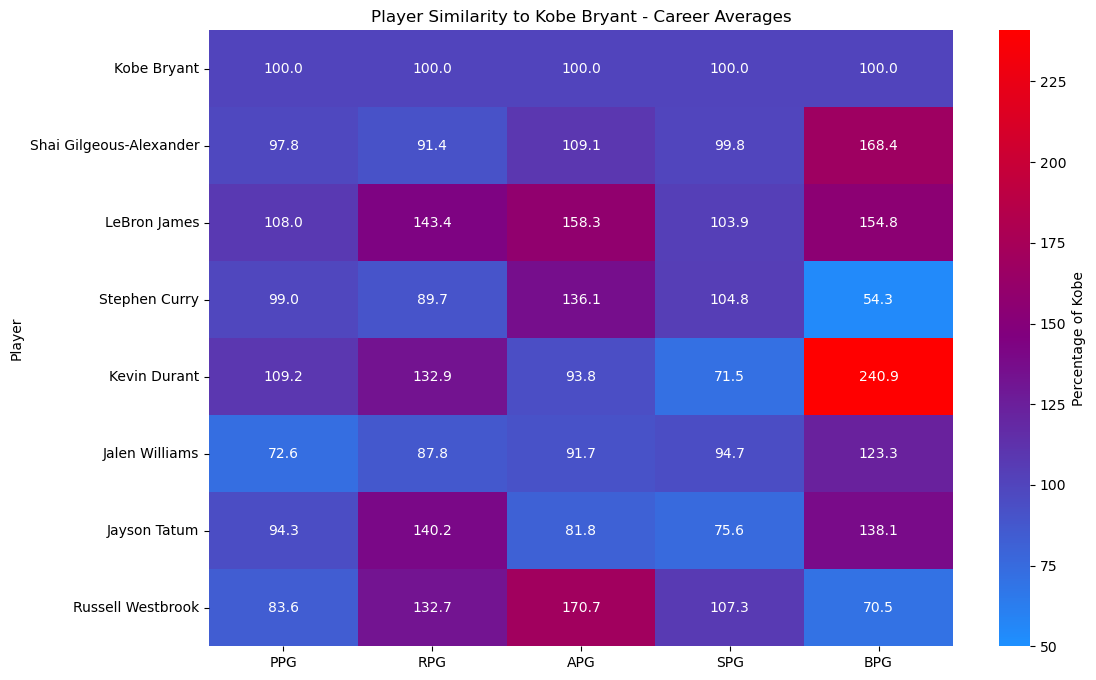

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Custom colormap: Blue (low) -> Purple (Kobe) -> Red (high)
colors = ["#1E90FF", "#800080", "#FF0000"]  # blue, purple, red
cmap = LinearSegmentedColormap.from_list("blue_purple_red", colors)

# Calculate similarity relative to Kobe
similarity = player_stats.div(player_stats.loc['Kobe Bryant']) * 100
similarity.loc['Kobe Bryant'] = 100

# Reorder so Kobe is first
similarity = similarity.reindex(['Kobe Bryant'] + [name for name in similarity.index if name != 'Kobe Bryant'])

# Set min and max for color scaling
vmin = 50  # minimum similarity to show
vmax = similarity.max().max()  # max similarity

plt.figure(figsize=(12, 8))
sns.heatmap(
    similarity,
    annot=True,
    fmt=".1f",
    cmap=cmap,
    vmin=vmin,
    vmax=vmax,
    cbar_kws={'label': 'Percentage of Kobe'}
)
plt.title("Player Similarity to Kobe Bryant - Career Averages")
plt.show()


---
## 🎨 Visualize Player Similarity to Kobe Bryant
The heatmap below shows how each player's career averages compare to Kobe Bryant (100%).
---